In [43]:
import subprocess
import sys

def install(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", package])
    except subprocess.CalledProcessError as e:
        print(f"Error installing {package}: {e}")

# Liste des packages à installer
packages = [
    "numpy",
    "pandas",
    "nltk",
    "gensim",
    "transformers",
    "torch",
    "tensorflow",
    "tensorflow_hub",
    "matplotlib",
    "mlflow",
    "scikit-learn",
    "seaborn"
]

# Installation des packages
for package in packages:
    install(package)

Chargement et exploration des données

Affichage de 20 lignes aléatoires :


,target,ids,date,flag,user,text
1389318,4,2053108123,Sat Jun 06 03:18:18 PDT 2009,NO_QUERY,TravelCoosBay,"@KellyWalls oh be sure to follow us, we will b..."
609779,0,2223867111,Thu Jun 18 08:48:32 PDT 2009,NO_QUERY,eliciachin,"Aww man, I've school tomorrow. Not a morning t..."
603287,0,2221616594,Thu Jun 18 05:42:42 PDT 2009,NO_QUERY,CherryKisses23,is still not feeling good!
1431510,4,2060087759,Sat Jun 06 18:13:59 PDT 2009,NO_QUERY,mehulrapper,so many parties and shit now
1152488,4,1978718490,Sun May 31 00:14:13 PDT 2009,NO_QUERY,Wrestlinchic323,@britneyspears Love you Britney!!! Big fan si...
1536015,4,2179155675,Mon Jun 15 08:43:19 PDT 2009,NO_QUERY,t3naciously,@for_my_stalkers of course! You wouldn't want ...
1447593,4,2062636376,Sat Jun 06 23:49:33 PDT 2009,NO_QUERY,Amandabannana,"dear twitter: I know you can't help me sleep, ..."
1206777,4,1986880638,Sun May 31 19:27:12 PDT 2009,NO_QUERY,twliciousness,@mgph3nom chilling on twitter via my spanking...
109588,0,1824597036,Sun May 17 02:04:48 PDT 2009,NO_QUERY,Strikeapose,Session FashionSpot...� demain
76100,0,1695467392,Mon May 04 06:12:36 PDT 2009,NO_QUERY,jaketapper,@chloebeetle And whats your reaction other tha...


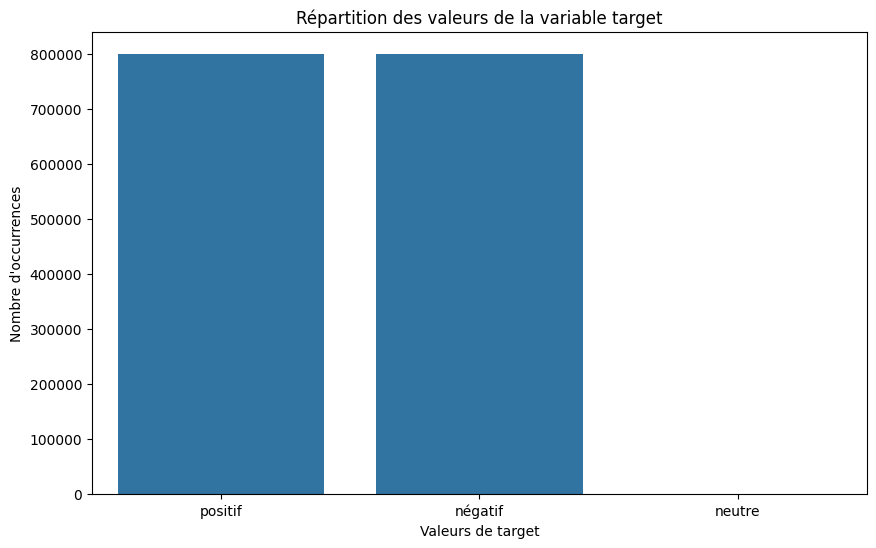

Statistiques descriptives :


,target,ids,date,flag,user,text
count,1600019,1600019,1600019,1600019,1600019,1600019
unique,3,1598316,774364,2,659776,1581467
top,positif,ids,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,800000,19,20,1600000,549,210


Valeurs manquantes par colonne :


target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chemin du fichier
file_path = 'Dataset_Init.csv'

# Les titres que vous souhaitez ajouter
headers = ["target", "ids", "date", "flag", "user", "text"]

# Lire les données existantes
with open(file_path, "r", encoding="utf-8") as file:
    data = file.readlines()

# Écrire les titres et ajouter les anciennes données
with open(file_path, "w", encoding="utf-8") as file:
    # Ajouter les titres
    file.write(",".join(headers) + "\n")
    # Ajouter les anciennes données
    file.writelines(data)

# Spécifiez les types de données pour les colonnes 0 et 1
dtype_spec = {
    "target": 'str',
    "ids": 'str'
}

# Lire le fichier CSV avec les types de données spécifiés
df = pd.read_csv(file_path, dtype=dtype_spec, low_memory=False)

# Sélectionner 20 lignes aléatoires
random_rows = df.sample(n=20)

# Afficher les lignes sélectionnées
print("Affichage de 20 lignes aléatoires :")
display(random_rows)

# Regroupement des valeurs de la colonne 'target' en catégories
df['target'] = df['target'].apply(lambda x: 'positif' if x == '4' else 'négatif' if x == '0' else 'neutre')

# Assurez-vous que toutes les catégories sont présentes
df['target'] = pd.Categorical(df['target'], categories=['positif', 'négatif', 'neutre'])

# Compter les occurrences de chaque valeur dans la colonne 'target'
target_counts = df['target'].value_counts()

# Créer un graphique à barres avec seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Répartition des valeurs de la variable target')
plt.xlabel('Valeurs de target')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# Afficher les statistiques descriptives
print("Statistiques descriptives :")
display(df.describe(include='all'))

# Afficher les valeurs manquantes
print("Valeurs manquantes par colonne :")
display(df.isnull().sum())

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Spécifier les types de données des colonnes
dtype_spec = {
    "target": 'str',
    "ids": 'str'
}

# Charger le fichier CSV dans un DataFrame avec les types de données spécifiés
df = pd.read_csv('Dataset_Init.csv', dtype=dtype_spec, low_memory=False)

# Convertir la colonne 'target' en type string
df['target'] = df['target'].astype(str)

# Diviser le DataFrame en 132 000 lignes tout en maintenant l'équilibre de la colonne 'target'
df_sampled, _ = train_test_split(df, train_size=132000, stratify=df['target'], random_state=42)

# Afficher les premières lignes du DataFrame échantillonné
display(df_sampled.head())

,target,ids,date,flag,user,text
234188,0,1979529677,Sun May 31 03:26:34 PDT 2009,NO_QUERY,archnix,bad weather !!
794127,0,2326866322,Thu Jun 25 07:36:53 PDT 2009,NO_QUERY,jill777,@DonnieWahlberg Morning! Will you @jasonjmikem...
605911,0,2222409635,Thu Jun 18 06:56:40 PDT 2009,NO_QUERY,jdillon05,Headed to the Beach for my last full day on th...
24338,0,1557961813,Sun Apr 19 06:44:42 PDT 2009,NO_QUERY,theGreener,"Lost to the scum, depressed now"
294817,0,1996693840,Mon Jun 01 15:31:26 PDT 2009,NO_QUERY,arythmaticflow,@starlaboob Well that sucks.


In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remplacer les URLs par le mot "URL"
    text = re.sub(r'http\S+|www\S+|https\S+', 'URL', text, flags=re.MULTILINE)
    # Remplacer les mentions par le mot "mention"
    text = re.sub(r'\@\w+', 'mention', text)
    # Remplacer les hashtags par le mot "hashtag"
    text = re.sub(r'\#\w+', 'hashtag', text)
    # Suppression des caractères spéciaux et des chiffres
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Conversion en minuscules
    text = text.lower()
    # Tokenisation
    tokens = word_tokenize(text)
    # Suppression des stopwords et de la ponctuation
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    # Stemming et lemmatization
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Exemple d'utilisation
#df['cleaned_text'] = df['text'].apply(clean_text)
df_sampled['cleaned_text'] = df_sampled['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\creus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\creus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\creus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Word2Vec

In [14]:
import numpy as np
from gensim.models import Word2Vec

# Entraînement du modèle Word2Vec
model_w2v = Word2Vec(sentences=df_sampled['cleaned_text'], vector_size=100, window=5, min_count=1, workers=4)

# Conversion des tweets en vecteurs
df_sampled['w2v'] = df_sampled['cleaned_text'].apply(lambda x: model_w2v.wv[x].mean(axis=0) if len(x) > 0 else np.zeros(100))

In [15]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model_bert(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

df_sampled['bert'] = df_sampled['text'].apply(lambda x: get_bert_embeddings(x).flatten())

c:\Users\creus\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
import tensorflow_hub as hub
import tensorflow as tf
import pandas as pd

# Correct URL for the Universal Sentence Encoder
model_use = hub.load("https://tfhub.dev/google/universal-sentence-encoder/2")

# Print the keys of the output dictionary
print(model_use.signatures['default'].structured_outputs)

def get_use_embeddings(text):
    embeddings = model_use.signatures['default'](tf.constant([text]))
    return list(embeddings.values())[0].numpy()[0]

# Assuming df_sampled is already defined and has a 'text' column
df_sampled['use'] = df_sampled['text'].apply(lambda x: get_use_embeddings(x))

{'default': <tf.Tensor 'Encoder_en/hidden_layers/l2_normalize:0' shape=(None, 512) dtype=float32>}


In [37]:
# Charger les vecteurs GloVe
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
import numpy as np

glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)
model_glove = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Construire un dictionnaire des vecteurs pour les mots utilisés
vocab = set(word for tokens in df_sampled['cleaned_text'] for word in tokens)
word_vectors = {word: model_glove[word] for word in vocab if word in model_glove}

# Fonction optimisée
def get_glove_embeddings(tokens):
    vectors = [word_vectors[word] for word in tokens if word in word_vectors]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

df_sampled['glove'] = df_sampled['cleaned_text'].apply(get_glove_embeddings)

C:\Users\creus\AppData\Local\Temp\ipykernel_14276\2382030686.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


FastText

In [38]:
import numpy as np
from gensim.models import FastText

# Entraînement du modèle FastText
model_fasttext = FastText(sentences=df_sampled['cleaned_text'], vector_size=100, window=5, min_count=1, workers=4)

# Conversion des tweets en vecteurs FastText
df_sampled['fasttext'] = df_sampled['cleaned_text'].apply(lambda x: model_fasttext.wv[x].mean(axis=0) if len(x) > 0 else np.zeros(100))

Évaluation des performances via ARI et t-SNE

ARI Word2Vec: 0.020178414358595687
ARI BERT: 0.032336616825257763
ARI USE: 0.011418764998581151
ARI GloVe: 0.008068796840079474
ARI FastText: 0.01589224987769433


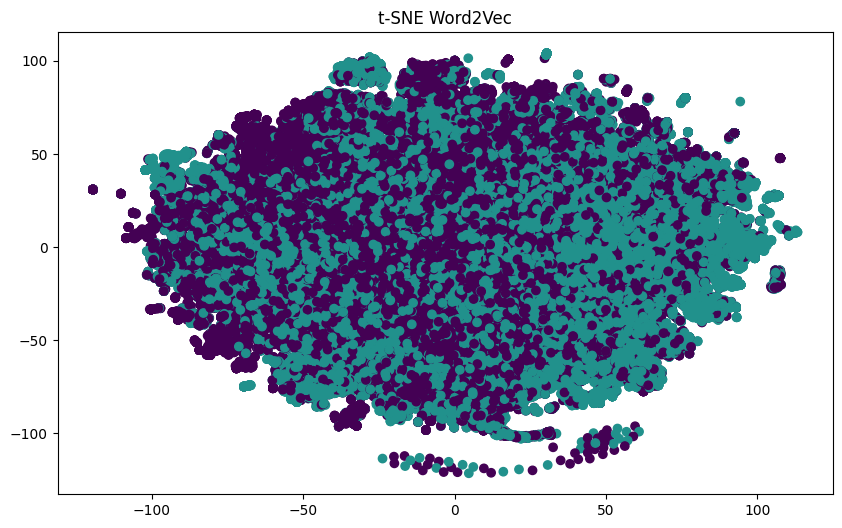

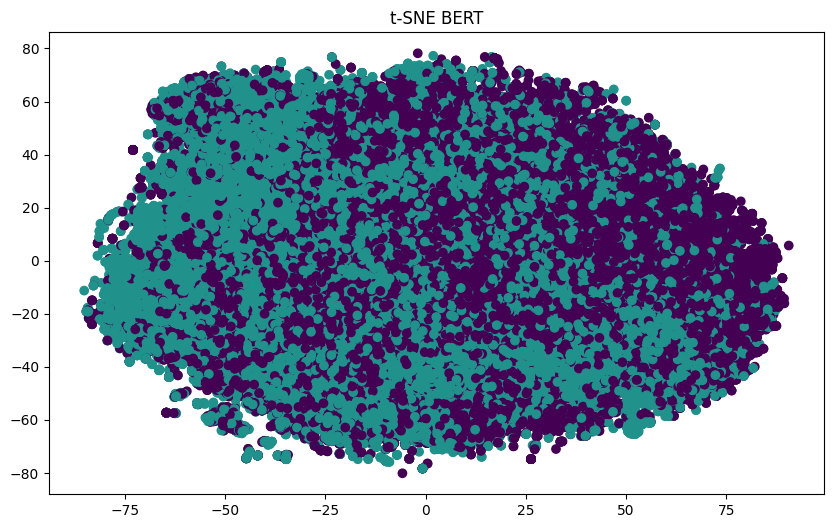

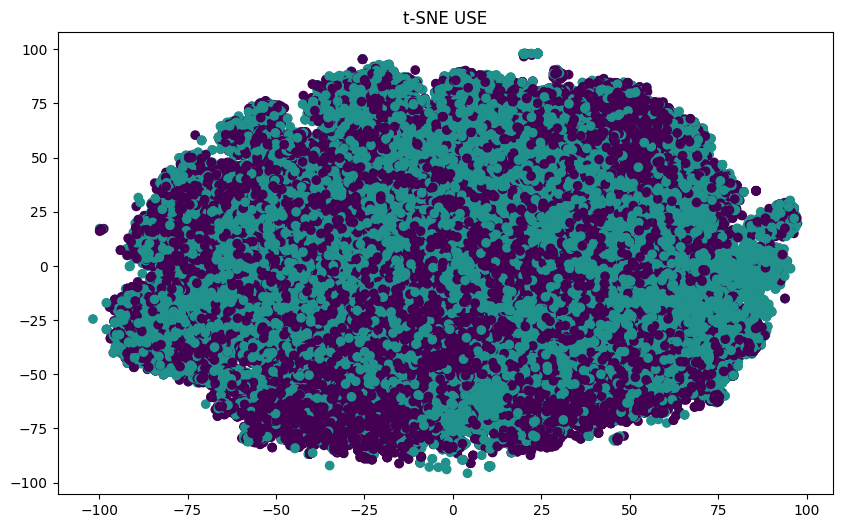

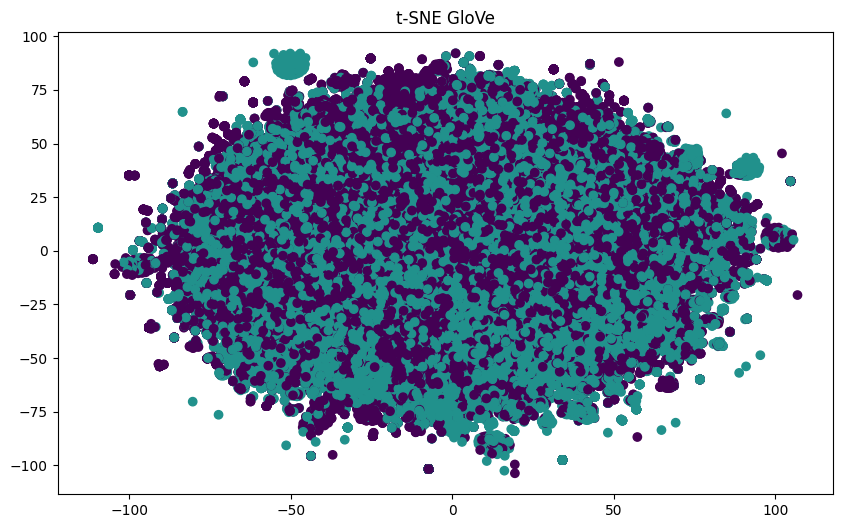

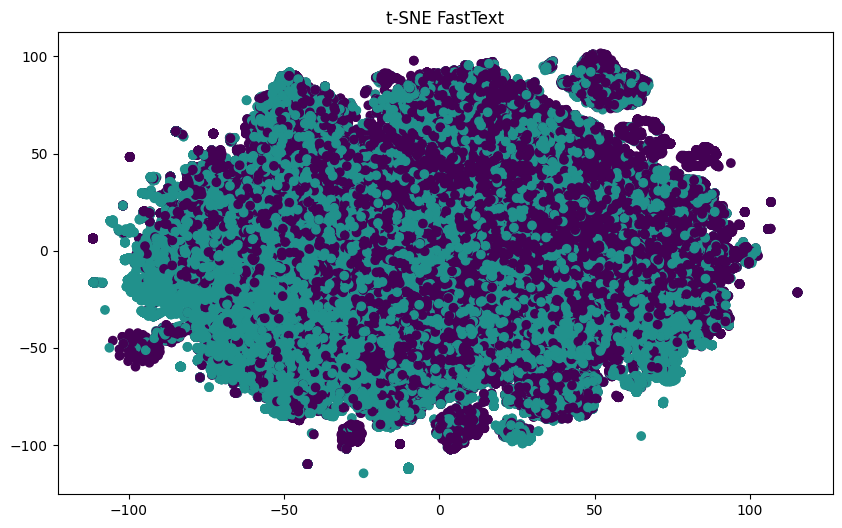

In [39]:
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Utilisation de la variable target comme étiquettes
true_labels = df_sampled['target'].astype('category').cat.codes

# Convertir les colonnes d'embeddings en numpy arrays
w2v_embeddings = np.vstack(df_sampled['w2v'].values)
bert_embeddings = np.vstack(df_sampled['bert'].values)
use_embeddings = np.vstack(df_sampled['use'].values)
glove_embeddings = np.vstack(df_sampled['glove'].values)
fasttext_embeddings = np.vstack(df_sampled['fasttext'].values)

# Normaliser les embeddings
scaler = StandardScaler()
w2v_embeddings_scaled = scaler.fit_transform(w2v_embeddings)
bert_embeddings_scaled = scaler.fit_transform(bert_embeddings)
use_embeddings_scaled = scaler.fit_transform(use_embeddings)
glove_embeddings_scaled = scaler.fit_transform(glove_embeddings)
fasttext_embeddings_scaled = scaler.fit_transform(fasttext_embeddings)

# Clustering avec KMeans sur les embeddings normalisés
n_clusters = len([label for label in np.unique(true_labels) if np.sum(true_labels == label) > 0])
kmeans_w2v = KMeans(n_clusters=n_clusters, random_state=42).fit(w2v_embeddings_scaled)
kmeans_bert = KMeans(n_clusters=n_clusters, random_state=42).fit(bert_embeddings_scaled)
kmeans_use = KMeans(n_clusters=n_clusters, random_state=42).fit(use_embeddings_scaled)
kmeans_glove = KMeans(n_clusters=n_clusters, random_state=42).fit(glove_embeddings_scaled)
kmeans_fasttext = KMeans(n_clusters=n_clusters, random_state=42).fit(fasttext_embeddings_scaled)

# Exemple d'évaluation avec ARI
ari_w2v = adjusted_rand_score(true_labels, kmeans_w2v.labels_)
ari_bert = adjusted_rand_score(true_labels, kmeans_bert.labels_)
ari_use = adjusted_rand_score(true_labels, kmeans_use.labels_)
ari_glove = adjusted_rand_score(true_labels, kmeans_glove.labels_)
ari_fasttext = adjusted_rand_score(true_labels, kmeans_fasttext.labels_)

print(f"ARI Word2Vec: {ari_w2v}")
print(f"ARI BERT: {ari_bert}")
print(f"ARI USE: {ari_use}")
print(f"ARI GloVe: {ari_glove}")
print(f"ARI FastText: {ari_fasttext}")

# Visualisation avec t-SNE
def plot_tsne(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.show()

# Exemple de visualisation
plot_tsne(w2v_embeddings, true_labels, 't-SNE Word2Vec')
plot_tsne(bert_embeddings, true_labels, 't-SNE BERT')
plot_tsne(use_embeddings, true_labels, 't-SNE USE')
plot_tsne(glove_embeddings, true_labels, 't-SNE GloVe')
plot_tsne(fasttext_embeddings, true_labels, 't-SNE FastText')

Tests de 3 modèles via MLFlow

Initialisation MLFlow

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import mlflow
import mlflow.tensorflow
import pandas as pd
import numpy as np

Loading and Preprocessing Data

In [56]:
# Vérifiez les valeurs uniques dans df_sampled['target']
print("Valeurs uniques dans df_sampled['target']:", np.unique(df_sampled['target']))

# Remplacez les valeurs non numériques par des valeurs numériques appropriées
df_sampled['target'] = np.where(df_sampled['target'] == 'target', 0, df_sampled['target'])

# Convertir d'abord les étiquettes en numérique si elles sont en string
df_sampled['target'] = df_sampled['target'].astype(int)

# Convertir les étiquettes 4 en 1
df_sampled['target'] = np.where(df_sampled['target'] == 4, 1, df_sampled['target'])  # Convertit explicitement en binaire 0/1

# Vérifiez les valeurs uniques après conversion
print("Valeurs uniques dans df_sampled['target'] après conversion:", np.unique(df_sampled['target']))

# Utilisation des embeddings USE de df_sampled
X = np.vstack(df_sampled['use'].values)
y = df_sampled['target'].values

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifiez les valeurs uniques dans y_train et y_test après la division
print("Valeurs uniques dans y_train:", np.unique(y_train))
print("Valeurs uniques dans y_test:", np.unique(y_test))

Valeurs uniques dans df_sampled['target']: ['0' '4' 'target']
Valeurs uniques dans df_sampled['target'] après conversion: [0 1]
Valeurs uniques dans y_train: [0 1]
Valeurs uniques dans y_test: [0 1]


Initializing MLFlow

In [46]:
# Initialize MLFlow
mlflow.set_experiment("Experimentation_projet_7")

<Experiment: artifact_location='file:///C:/Users/creus/OneDrive/Bureau/IA/7e%20projet/mlruns/620427133914755322', creation_time=1736084105350, experiment_id='620427133914755322', last_update_time=1736084105350, lifecycle_stage='active', name='Experimentation_projet_7', tags={}>

Logistic Regression Model

In [57]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import mlflow

# Modèle de Régression Logistique
with mlflow.start_run(run_name="Logistic_Regression_USE"):
    model_lr = LogisticRegression(random_state=42)
    model_lr.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble d'entraînement
    y_pred_lr = model_lr.predict(X_train)
    y_pred_proba_lr = model_lr.predict_proba(X_train)[:, 1]  # Probabilités pour la classe positive
    
    # Calcul des métriques
    f1_lr = f1_score(y_train, y_pred_lr)
    precision_lr = precision_score(y_train, y_pred_lr)
    recall_lr = recall_score(y_train, y_pred_lr)
    auc_lr = roc_auc_score(y_train, y_pred_proba_lr)
    
    # Logging des métriques dans MLflow
    mlflow.log_metric("f1_score", f1_lr)
    mlflow.log_metric("precision", precision_lr)
    mlflow.log_metric("recall", recall_lr)
    mlflow.log_metric("auc", auc_lr)
    
    # Sauvegarde du modèle
    mlflow.sklearn.log_model(model_lr, "model")

2025/02/07 10:44:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LSTM Model

In [59]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import mlflow

# Conversion des étiquettes en format binaire 0/1
y_train_lstm = y_train
y_test_lstm = y_test

# LSTM Model
with mlflow.start_run(run_name="LSTM"):
    # Définition du modèle
    model_lstm = Sequential([
        Dropout(0.2, input_shape=(X_train.shape[1],)),
        Dense(100, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    # Compilation du modèle
    model_lstm.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    
    # Callback pour early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1
    )
    
    # Entraînement du modèle
    history = model_lstm.fit(
        X_train,
        y_train_lstm,
        epochs=10,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Prédictions
    y_pred_proba = model_lstm.predict(X_test)
    y_pred_lstm = (y_pred_proba > 0.5).astype("int32")
    
    # Calcul des métriques
    f1_lstm = f1_score(y_test_lstm, y_pred_lstm)
    precision_lstm = precision_score(y_test_lstm, y_pred_lstm)
    recall_lstm = recall_score(y_test_lstm, y_pred_lstm)
    auc_lstm = roc_auc_score(y_test_lstm, y_pred_proba)
    
    # Logging des paramètres
    mlflow.log_param("dropout_rate", 0.2)
    mlflow.log_param("dense_units", 100)
    
    # Logging des métriques
    mlflow.log_metric("f1_score", f1_lstm)
    mlflow.log_metric("precision", precision_lstm)
    mlflow.log_metric("recall", recall_lstm)
    mlflow.log_metric("auc", auc_lstm)
    
    # Logging des métriques d'entraînement
    for epoch, (loss, val_loss) in enumerate(zip(history.history['loss'], history.history['val_loss'])):
        mlflow.log_metric(f"train_loss_epoch_{epoch+1}", loss)
        mlflow.log_metric(f"val_loss_epoch_{epoch+1}", val_loss)
    
    # Sauvegarde du modèle au format HDF5
    model_lstm.save("model_lstm.h5")
    mlflow.log_artifact("model_lstm.h5")

c:\Users\creus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7539 - loss: 0.5120 - val_accuracy: 0.7828 - val_loss: 0.4595
Epoch 2/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7754 - loss: 0.4670 - val_accuracy: 0.7873 - val_loss: 0.4528
Epoch 3/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7789 - loss: 0.4609 - val_accuracy: 0.7900 - val_loss: 0.4475
Epoch 4/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7820 - loss: 0.4553 - val_accuracy: 0.7938 - val_loss: 0.4462
Epoch 5/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7835 - loss: 0.4534 - val_accuracy: 0.7952 - val_loss: 0.4455
Epoch 6/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7903 - loss: 0.4445 - val_accuracy: 0.7945 - val_loss: 0.4427
Epoch 7/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7920 - loss: 0.4427 - val_accuracy: 0.7949 - val_loss: 0.4417
Epoch 8/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7919 - loss: 0.4443 - 

In [ ]:
import tensorflow as tf
import numpy as np

# Define the model architecture
new_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(512,), name='input_layer_2'),
    tf.keras.layers.Embedding(
        input_dim=5000,  # Vocabulary size
        output_dim=100,  # Embedding dimension
        name='embedding_3'
    ),
    tf.keras.layers.SpatialDropout1D(0.3, name='spatial_dropout1d_3'),
    tf.keras.layers.LSTM(100, name='lstm_3'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='dense_7')
])

# Load the original model
original_model = tf.keras.models.load_model('model_lstm.h5')

# Copy the weights from the original model to the new model
for i in range(len(original_model.layers)):
    try:
        new_model.layers[i].set_weights(original_model.layers[i].get_weights())
    except Exception as e:
        print(f"Error copying weights for layer {i}: {str(e)}")

# Compile the model
new_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Save the new model in the recommended Keras format
new_model.save("model_lstm_compatible.h5")

# Verify that the model has been saved correctly
test_model = tf.keras.models.load_model('model_lstm_compatible.keras')
print("New model created and saved successfully!")

# Display the summary of the new model for verification
test_model.summary()

In [ ]:
import tensorflow as tf

# Charger votre modèle
model = tf.keras.models.load_model('model_lstm.h5')

# Afficher la structure du modèle
model.summary()

BERT Model

In [60]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import mlflow
import numpy as np
import os

# Désactiver la journalisation automatique de mlflow.tensorflow
mlflow.tensorflow.autolog(disable=True)

# Conversion des étiquettes en format binaire 0/1
y_train_bert = y_train
y_test_bert = y_test

# Démarrer une session MLflow
with mlflow.start_run(run_name="BERT_approach_fast"):
    # Charger le tokenizer et le modèle de base BERT
    tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
    
    # Convertir les données en liste de strings si ce n'est pas déjà le cas
    if isinstance(X_train[0], str):
        X_train_texts = X_train[:1000]  # Limiter à 1000 échantillons pour l'entraînement
        X_test_texts = X_test[:200]     # Limiter à 200 échantillons pour le test
    else:
        X_train_texts = [str(text) for text in X_train[:1000]]
        X_test_texts = [str(text) for text in X_test[:200]]
    
    # Ajuster les labels en conséquence
    y_train_bert = y_train_bert[:1000]
    y_test_bert = y_test_bert[:200]
    
    # Tokenizer avec une longueur maximale réduite
    train_encodings = tokenizer_bert(
        X_train_texts, 
        truncation=True, 
        padding=True, 
        max_length=128,  # Réduit de 512 à 128
        return_tensors="tf"
    )
    test_encodings = tokenizer_bert(
        X_test_texts, 
        truncation=True, 
        padding=True, 
        max_length=128,  # Réduit de 512 à 128
        return_tensors="tf"
    )

    # Augmenter la taille du batch pour plus de rapidité
    train_dataset = tf.data.Dataset.from_tensor_slices((
        dict(train_encodings),
        y_train_bert
    )).batch(32)  # Augmenté de 16 à 32

    test_dataset = tf.data.Dataset.from_tensor_slices((
        dict(test_encodings),
        y_test_bert
    )).batch(32)  # Augmenté de 16 à 32

    class BertClassifier(tf.keras.Model):
        def __init__(self, bert_model):
            super().__init__()
            self.bert = bert_model
            self.dropout = Dropout(0.1)
            self.classifier = Dense(1, activation='sigmoid')
            
        def call(self, inputs, training=False):
            input_ids = tf.cast(inputs['input_ids'], tf.int32)
            attention_mask = tf.cast(inputs['attention_mask'], tf.int32)
            
            outputs = self.bert(
                input_ids=input_ids, 
                attention_mask=attention_mask,
                training=False
            )
            
            pooled_output = outputs[1]
            pooled_output = self.dropout(pooled_output, training=training)
            return self.classifier(pooled_output)

    base_model = TFBertModel.from_pretrained('bert-base-uncased')
    model_bert = BertClassifier(base_model)

    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)  # Légèrement augmenté
    loss = tf.keras.losses.BinaryCrossentropy()
    metrics = [tf.keras.metrics.BinaryAccuracy(name="accuracy")]  # Réduit le nombre de métriques

    model_bert.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=1,  # Réduit de 2 à 1
        restore_best_weights=True
    )

    history = model_bert.fit(
        train_dataset,
        epochs=2,  # Réduit de 3 à 2
        validation_data=test_dataset,
        callbacks=[early_stopping]
    )

    y_pred_proba = model_bert.predict(test_dataset, batch_size=32).ravel()
    y_pred_bert = (y_pred_proba > 0.5).astype("int32")

    # Calculer les métriques finales
    f1_bert = f1_score(y_test_bert, y_pred_bert)
    precision_bert = precision_score(y_test_bert, y_pred_bert)
    recall_bert = recall_score(y_test_bert, y_pred_bert)
    auc_bert = roc_auc_score(y_test_bert, y_pred_proba)

    # Logger les métriques et paramètres
    mlflow.log_param("model_type", "BERT_fast")
    mlflow.log_param("max_length", 128)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("epochs", 2)
    mlflow.log_param("training_samples", 1000)
    mlflow.log_param("test_samples", 200)

    mlflow.log_metric("f1_score", f1_bert)
    mlflow.log_metric("precision", precision_bert)
    mlflow.log_metric("recall", recall_bert)
    mlflow.log_metric("auc", auc_bert)

    weights_path = "bert_model_weights.weights.h5"
    model_bert.save_weights(weights_path)
    if os.path.exists(weights_path):
        mlflow.log_artifact(weights_path)
        os.remove(weights_path)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions 

Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 198s 6s/step - accuracy: 0.4874 - loss: 0.8296 - val_accuracy: 0.5600 - val_loss: 0.6906
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 188s 6s/step - accuracy: 0.4779 - loss: 0.7391 - val_accuracy: 0.5500 - val_loss: 0.6853
7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step
